<a href="https://colab.research.google.com/github/antonsysoev/DeepLearning/blob/main/Basic_deep_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras import models
from keras import layers

import matplotlib.pyplot as plt

from keras.utils import to_categorical

import numpy as np

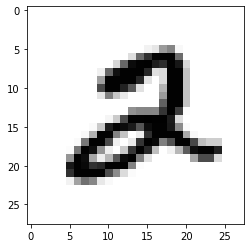

In [ ]:
digit = train_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
train_images[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_labels[5]

2

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

Перед обучением мы выполним предварительную обработку данных, преобразовав их в форму, которую ожидает получить нейронная сеть, и масштабируем их так, чтобы все значения оказались в интервале [0, 1]. Исходные данные — обучающие изображения — хранятся в трехмерном массиве (60000, 28, 28) типа uint8, значениями в котором являются числа в интервале [0, 255]. Мы преобразуем его в массив (60000, 28 * 28) типа float32 со значениями в интервале [0, 1].

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 12s 19ms/step - loss: 0.2560 - accuracy: 0.9247
Epoch 2/5
469/469 [==============================] - 10s 20ms/step - loss: 0.1042 - accuracy: 0.9697
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0495 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0371 - accuracy: 0.9888


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9797


In [ ]:
print('test_acc:', test_acc)

test_acc: 0.9797000288963318


Классификация по двум классам, или бинарная классификация, является едва ли не самой распространенной задачей машинного обучения. В этом примере посмотрим, как классифицировать отзывы к фильмам на положительные и отрицательные, опираясь на текст отзывов.

Набор данных IMDB: множество из 50 000 самых разных отзывов к кинолентам в интернет-базе фильмов (Internet Movie Database). Набор разбит на 25 000 обучающих и 25 000 контрольных отзывов, каждый набор на 50 % состоит из отрицательных и на 50 % из положительных отзывов.

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [ ]:
train_labels[0]

1

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/30
30/30 [==============================] - 4s 130ms/step - loss: 0.1072 - accuracy: 0.9666 - val_loss: 0.3129 - val_accuracy: 0.8847
Epoch 2/30
30/30 [==============================] - 1s 37ms/step - loss: 0.0855 - accuracy: 0.9739 - val_loss: 0.3928 - val_accuracy: 0.8669
Epoch 3/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0753 - accuracy: 0.9763 - val_loss: 0.4022 - val_accuracy: 0.8758
Epoch 4/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0562 - accuracy: 0.9845 - val_loss: 0.4078 - val_accuracy: 0.8781
Epoch 5/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.5665 - val_accuracy: 0.8466
Epoch 6/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.4773 - val_accuracy: 0.8751
Epoch 7/30
30/30 [==============================] - 1s 36ms/step - loss: 0.0277 - accuracy: 0.9928 - val_loss: 0.5211 - val_accuracy: 0.8755
Epoch 8/30
3

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

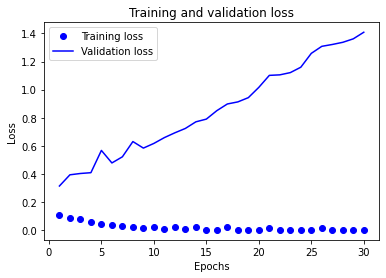

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 31)


plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 4s 62ms/step - loss: 0.4477 - accuracy: 0.8217
Epoch 2/4
49/49 [==============================] - 3s 56ms/step - loss: 0.2554 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 2s 42ms/step - loss: 0.2000 - accuracy: 0.9274
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3006 - accuracy: 0.8799


In [ ]:
results

[0.30058494210243225, 0.8798800110816956]

In [ ]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.15270029],
       [0.9998105 ],
       [0.62638205],
       ...,
       [0.07857659],
       [0.06418446],
       [0.54617923]], dtype=float32)

In [ ]:
y_test[-2]

0.0

Мы будем работать с набором данных Reuters — выборкой новостных лент и их тем, публиковавшихся агентством Reuters в 1986 году. Это простой набор данных, широко используемых для классификации текста. Существует 46 разных тем; не- которые темы более широко представлены, некоторые — менее, но для каждой из них в обучающем наборе имеется не менее 10 примеров.

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.
items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 3.4639 - accuracy: 0.3545 - val_loss: 2.9967 - val_accuracy: 0.5600
Epoch 2/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6383 - accuracy: 0.5723 - val_loss: 2.2978 - val_accuracy: 0.5800
Epoch 3/20
16/16 [==============================] - 1s 31ms/step - loss: 2.0287 - accuracy: 0.6084 - val_loss: 1.8677 - val_accuracy: 0.6170
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 1.6624 - accuracy: 0.6572 - val_loss: 1.6249 - val_accuracy: 0.6480
Epoch 5/20
16/16 [==============================] - 1s 32ms/step - loss: 1.4374 - accuracy: 0.7008 - val_loss: 1.4835 - val_accuracy: 0.6720
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 1.2820 - accuracy: 0.7241 - val_loss: 1.3839 - val_accuracy: 0.6930
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 1.1635 - accuracy: 0.7412 - val_loss: 1.3115 - val_accuracy: 0.7090
Epoch 8/20
16

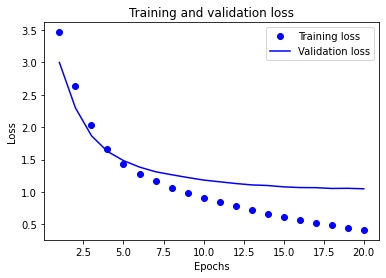

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

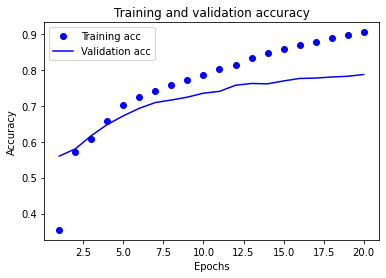

In [ ]:
plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 68ms/step - loss: 2.6440 - accuracy: 0.4648 - val_loss: 1.7690 - val_accuracy: 0.6290
Epoch 2/9
16/16 [==============================] - 1s 51ms/step - loss: 1.4653 - accuracy: 0.7003 - val_loss: 1.3221 - val_accuracy: 0.7030
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.0787 - accuracy: 0.7710 - val_loss: 1.1394 - val_accuracy: 0.7530
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8425 - accuracy: 0.8185 - val_loss: 1.0439 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 56ms/step - loss: 0.6716 - accuracy: 0.8609 - val_loss: 0.9826 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 1s 90ms/step - loss: 0.5346 - accuracy: 0.8933 - val_loss: 0.9324 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 85ms/step - loss: 0.4259 - accuracy: 0.9157 - val_loss: 0.8974 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

In [ ]:
results

[1.0005024671554565, 0.790739119052887]

In [ ]:
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.predict(x_test)[0]

71/71 [==============================] - 1s 7ms/step


array([6.03682656e-06, 8.53661113e-05, 6.45337764e-07, 9.82094288e-01,
       1.55201564e-02, 1.85823225e-07, 2.36745200e-05, 9.83745394e-06,
       1.11867579e-04, 4.32554589e-05, 9.71540067e-06, 1.62464727e-04,
       4.51643318e-05, 1.21338504e-04, 8.07179822e-06, 4.69854058e-06,
       2.52750586e-04, 8.77462662e-05, 3.60011400e-05, 1.10979454e-04,
       3.53917741e-04, 3.22418520e-04, 1.38413043e-05, 5.53131486e-06,
       4.09869472e-06, 4.22044723e-05, 6.94710252e-07, 2.85599441e-07,
       3.53829491e-05, 3.85070707e-05, 3.12431424e-04, 9.30358055e-06,
       7.77630532e-07, 1.22934289e-05, 1.86120869e-05, 1.53696362e-06,
       3.67427929e-05, 1.18115089e-07, 1.81006703e-06, 2.69358006e-05,
       2.13585781e-06, 8.70440272e-06, 8.99608040e-06, 4.97442716e-06,
       2.58470368e-06, 1.09462667e-06], dtype=float32)

ППопытаемся предсказать медианную цену на дома в пригороде Бостона в середине 1970-х по таким данным о пригороде того времени, как уровень преступности, ставка местного имущественного налога и т. д. Набор данных, который нам предстоит использовать, имеет интересное отличие от двух предыдущих примеров. Он содержит относительно немного образцов данных: всего 506, разбитых на 404 обучающих и 102 контрольных образца. И каждый признак во входных данных (например, уровень преступности) имеет свой масштаб. Например, некоторые признаки являются пропорциями и имеют значения между 0 и 1, другие — между 1 и 12 и т. д.

In [ ]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [ ]:
train_targets[0]

15.2

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Чтобы оценить качество сети в ходе корректировки ее параметров (таких, как количество эпох обучения), можно разбить исходные данные на обучающий и проверочный наборы, как это делалось в предыдущих примерах. Однако так как у нас и без того небольшой набор данных, проверочный набор получился бы слишком маленьким (скажем, что-нибудь около 100 образцов). Как следствие, оценки при проверке могут сильно меняться в зависимости от того, какие данные попадут в проверочный и обучающий наборы: оценки при проверке могут иметь слишком большой разброс. Это не позволит надежно оценить качество модели.

Лучшей практикой в таких ситуациях является применение перекрестной проверки по K блокам (K-fold cross-validation).
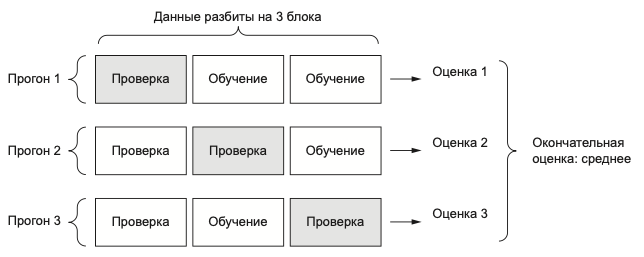



In [ ]:
k= 4
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1)
              * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
                  epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
model.evaluate(val_data, val_targets, verbose=0)

[11.516331672668457, 2.5055413246154785]

In [ ]:
all_scores

[1.9982718229293823, 2.714320421218872, 2.676541805267334, 2.5055413246154785]

In [ ]:
num_epochs = 25
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples:
              (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
     train_data[(i + 1) * num_val_samples:]],
    axis=0)
  partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
     train_targets[(i + 1) * num_val_samples:]],
    axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

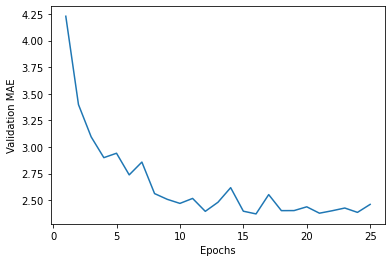

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 4ms/step - loss: 18.3592 - mae: 2.6739


2.6738879680633545